DataScience for Work - Human Resources - kaggle dataset: https://www.kaggle.com/datasets/soylevbeytullah/ds4work-human-resources/code
Objective: Utilize data science to predict employee turnover and enhance the Human Resources department.


## Goal: predict employee turnover and determine the features' importance

## Import Librairies

In [46]:
# -- Pandas
import pandas as pd
# -- Numpy
import numpy as np 
# -- Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# -- Seaborn
import seaborn as sns
# -- Plot
import matplotlib.pyplot as plt


## Import data

In [47]:
# -- Imported from local computer after download from Kaggle
df = pd.read_csv("../HR1/Human_Resources.csv")

### Exploration of the dataset

In [48]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [49]:
df.shape

(1470, 35)

In [50]:
df.describe(include= 'all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [51]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [53]:
#check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [54]:
#describe and count values
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


#### Data TARGET & cleanning


In [55]:
# Data target : 'Attrition' is in the form of Yes or No. This column, needs to be changed to 1 or zero
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [56]:
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [57]:
# Data  in 'OverTime'  is in the form of Yes or No. This column, needs to be changed to 1 or zero
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

In [58]:
df['OverTime'].value_counts()

OverTime
0    1054
1     416
Name: count, dtype: int64

In [59]:
# drop 'Over18' column that is unnecessary (everyone is over 18)
df = df.drop('Over18', axis=1)


In [60]:
# Show new dataframe
print(df)

      Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount

### Visualizations

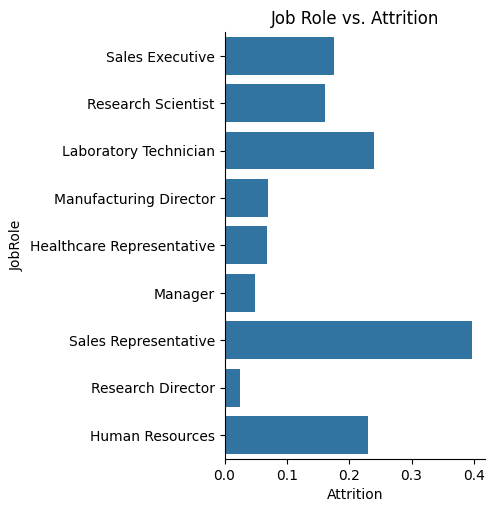

In [61]:
# Visualization of Data : per job role
sns.catplot(x="Attrition", y="JobRole",data=df, kind="bar", errorbar=None)
plt.title('Job Role vs. Attrition')
plt.show()

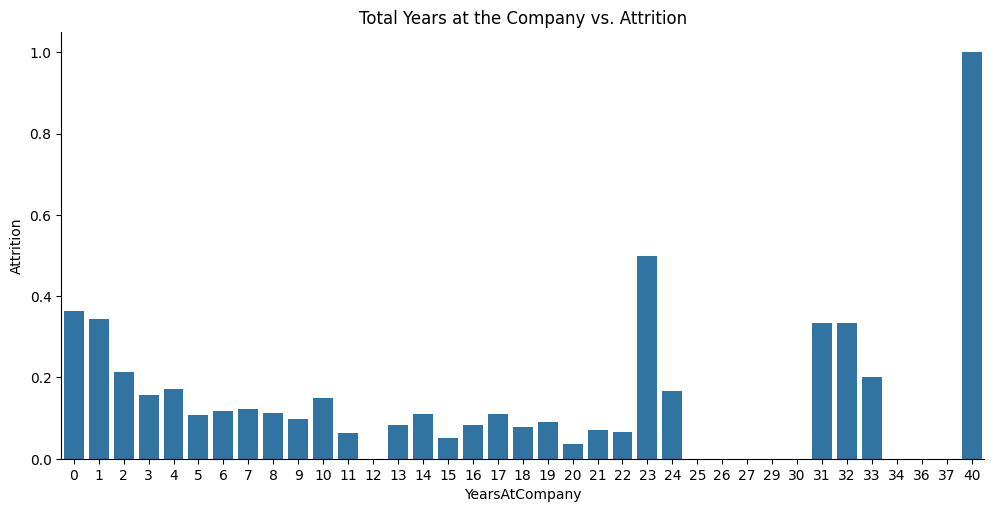

In [62]:
# Compare with Total Years at the company
sns.catplot(x="YearsAtCompany", y="Attrition",data=df, kind="bar", height=5, aspect=2, errorbar=None)
plt.title('Total Years at the Company vs. Attrition')
plt.show()

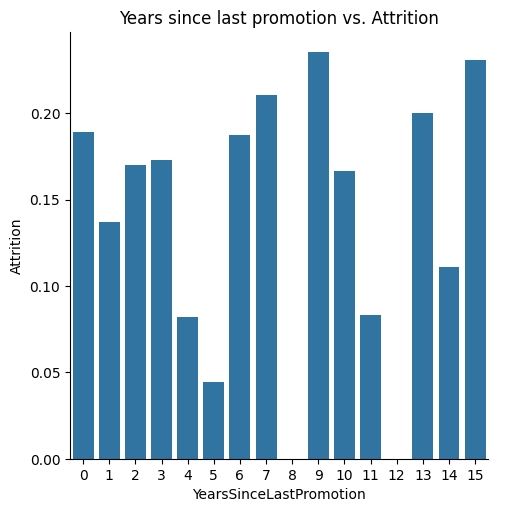

In [63]:
# Compare with last promotion
sns.catplot(x="YearsSinceLastPromotion", y="Attrition",data=df, kind="bar", errorbar=None)
plt.title('Years since last promotion vs. Attrition')
plt.show()

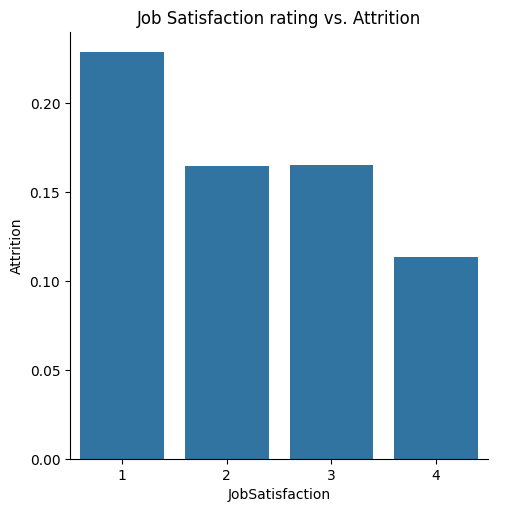

In [64]:
# Compare with Job Satisfaction
sns.catplot(x="JobSatisfaction", y="Attrition",data=df, kind="bar", errorbar=None)
plt.title('Job Satisfaction rating vs. Attrition')
plt.show()

In [65]:
# Create features List, select categorical and numerical features
cat_features = ['BusinessTravel', 
                'Department',
                'EducationField',
                'Gender',
                'JobRole', 
                'MaritalStatus',
                # 'OverTime'
                ]
num_features = ['Age', 
                'DailyRate',
                'DistanceFromHome', 
                'Education', 
                'EmployeeCount',
                'EmployeeNumber', 
                'EnvironmentSatisfaction', 
                'Gender', 
                'HourlyRate',
                'JobInvolvement', 
                'JobLevel',
                # 'OverTime',
                'JobSatisfaction',
                'MonthlyIncome', 
                'MonthlyRate', 
                'NumCompaniesWorked',
                'OverTime', 
                'PercentSalaryHike', 
                'PerformanceRating',
                'RelationshipSatisfaction', 
                'StandardHours', 
                # 'StockOptionLevel',
                'TotalWorkingYears', 
                'TrainingTimesLastYear', 
                'WorkLifeBalance',
                'YearsAtCompany', 
                'YearsInCurrentRole', 
                'YearsSinceLastPromotion',
                'YearsWithCurrManager'
                ]
features_list = cat_features + num_features

In [66]:
#separate X and y
print("Separating target variable from features...")
X = df.loc[:,features_list] # add feature_list into loc 
y = df.loc[:,'Attrition'] # set "Attrition" as the target variable
print("done")

Separating target variable from features...
done


In [67]:


# Convert categorical variables in X to dummy variables
X = pd.get_dummies(X, drop_first=True)



In [68]:
# Split your data in train and test sets
# Divide dataset Train set & Test set 
print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=101,
                                                    stratify=y)

print("...Done.") 
#..
# Make all the required preprocessings on the train set
print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()


Splitting dataset into train set and test set...
...Done.
#### X_train BEFORE preprocessing ####
      Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
220    36       1396                 5          2              1   
552    56        832                 9          3              1   
1139   32        634                 5          4              1   
949    39        524                18          2              1   
1296   30       1092                10          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
220              304                        4          62               3   
552              762                        3          81               3   
1139            1607                        2          35               4   
949             1322                        1          32               3   
1296            1816                        1          64               3   

      JobLevel  ...  JobRole_La

In [69]:

# Apply SMOTE to the training data 
""" The purpose of applying SMOTE to the training data is to address the issue of class imbalance, 
particularly when the minority class is underrepresented in the dataset. By oversampling the minority 
class, SMOTE aims to improve the model's ability to learn from and accurately classify 
minority class instances."""

smote = SMOTE(random_state=101)
X_train, y_train = smote.fit_resample(X_train, y_train)



In [70]:
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Machine Learning

#### Random Forest with GridSearchCV

In [71]:
# Define the parameter grid for GridSearchCV
""" Hyperparameter Tuning with GridSearchCV:
GridsearchCV is a technique used to tune hyperparameters by exhaustively searching through a specified 
parameter grid and selecting the best combination of hyperparameters based on a scoring metric.
The param_grid dictionary specifies the hyperparameters and their respective values that GridSearchCV 
will explore to find the optimal combination."""

param_grid = {
    'n_estimators': [50,100,150, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion' :['gini', 'entropy']
}

In [72]:

#..
# ## Build your model
# Train model
print("Train model...")
classifier = RandomForestClassifier(random_state=101)
classifier.fit(X_train, y_train) # This steps is the actual training 
print("...Done.")
# ..
# Evaluate it
## Testing pipeline ###
print("--- Testing pipeline ---")

# Copy X_train to avoid caveats
X_test = X_test.copy()



Train model...
...Done.
--- Testing pipeline ---


#### RandomForest Classifier

In [73]:

# Initialize GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')


# Fit GridSearchCV
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [74]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [75]:
# Train the Random Forest Classifier with the best parameters
classifier = RandomForestClassifier(**best_params, random_state=101)
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=101)

In [76]:
# Make predictions
y_pred = classifier.predict(X_test)

In [77]:


# Print the classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.50      0.21      0.30        47

    accuracy                           0.84       294
   macro avg       0.68      0.59      0.60       294
weighted avg       0.81      0.84      0.81       294

Confusion Matrix:
 [[237  10]
 [ 37  10]]


In [78]:
# Train Accuracy Score
print("Train score: ", classifier.score(X_train, y_train))
# Test Accuracy Score
print("Test score: ", classifier.score(X_test, y_test))

Train score:  1.0
Test score:  0.8401360544217688


#### Confusion Matrix

--- Assessment of performances ---


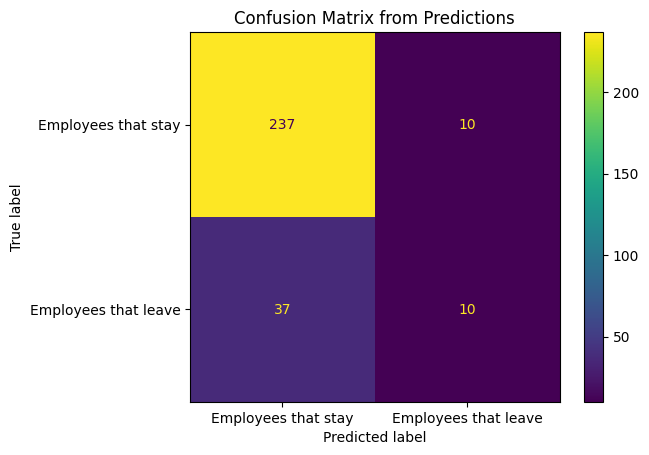

In [79]:
# Overfitting - Create the confusion matrix with ConfusionMatrixDisplay
### Assessment of performances ###
print("--- Assessment of performances ---")
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Employees that stay", "Employees that leave"])
cm_display.plot(ax=plt.gca())  # Plot confusion matrix
plt.title("Confusion Matrix from Predictions")  # Set title for the plot
plt.show()  # Show the graph

#### Decision Tree

In [80]:
# Train model
print("Train model...")
classifier = DecisionTreeClassifier(min_samples_split=80, class_weight="balanced" )
classifier.fit(X_train, y_train) # This steps is the actual training
print("...Done.")
print("Train score: ", classifier.score(X_train, y_train))
print("Test score: ", classifier.score(X_test, y_test))

Train model...
...Done.
Train score:  0.8559837728194726
Test score:  0.7585034013605442


--- Assessment of performances of the Decision Tree ---


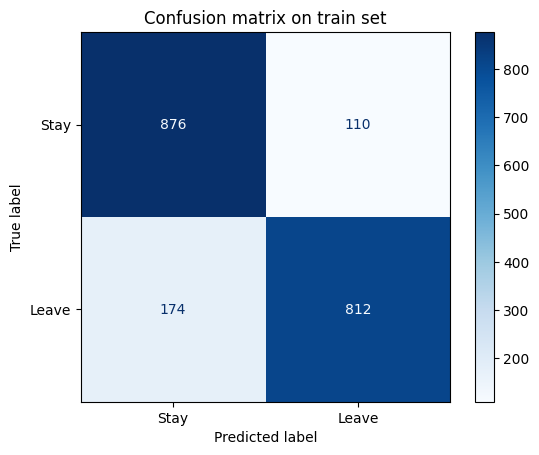

accuracy-score on train set :  0.8559837728194726


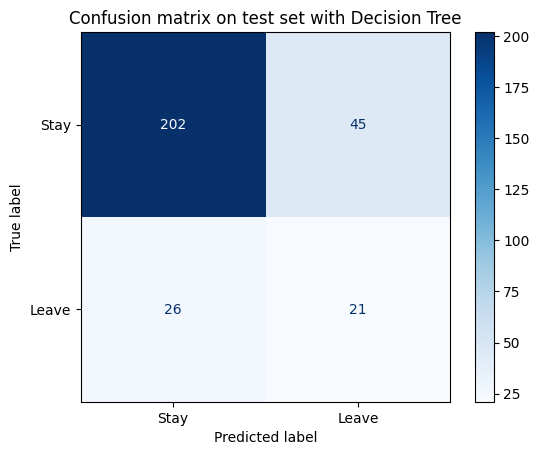

accuracy-score on test set :  0.7585034013605442


In [81]:
### Assessment of performances ###
print("--- Assessment of performances of the Decision Tree ---")

# Plot confusion matrix
# Confusion matrix and accuracy score on the train set
train_predictions = classifier.predict(X_train)
train_cm = confusion_matrix(y_train, train_predictions)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Stay", "Leave"])
train_disp.plot(cmap=plt.cm.Blues)
train_disp.ax_.set_title("Confusion matrix on train set")
plt.show()
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


test_predictions = classifier.predict(X_test)
test_cm = confusion_matrix(y_test, test_predictions)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Stay", "Leave"])
test_disp.plot(cmap=plt.cm.Blues)
test_disp.ax_.set_title("Confusion matrix on test set with Decision Tree")
plt.show()
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

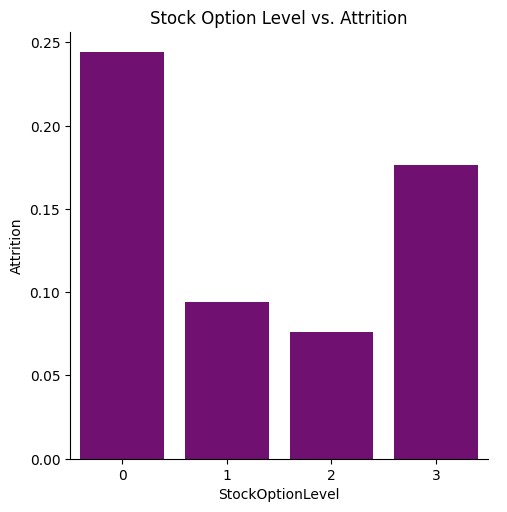

In [82]:
# Compare with Stock Option Level

sns.catplot(x="StockOptionLevel", 
            y="Attrition", 
            data=df, 
            kind="bar", 
            color="purple", 
            errorbar=None,
            order=df["StockOptionLevel"].value_counts().index
            )
plt.title('Stock Option Level vs. Attrition')
plt.show()

#### Feature Importance

numerical columns are:  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturi

C:\Users\Karen\AppData\Local\Temp\ipykernel_2980\2796936966.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance",


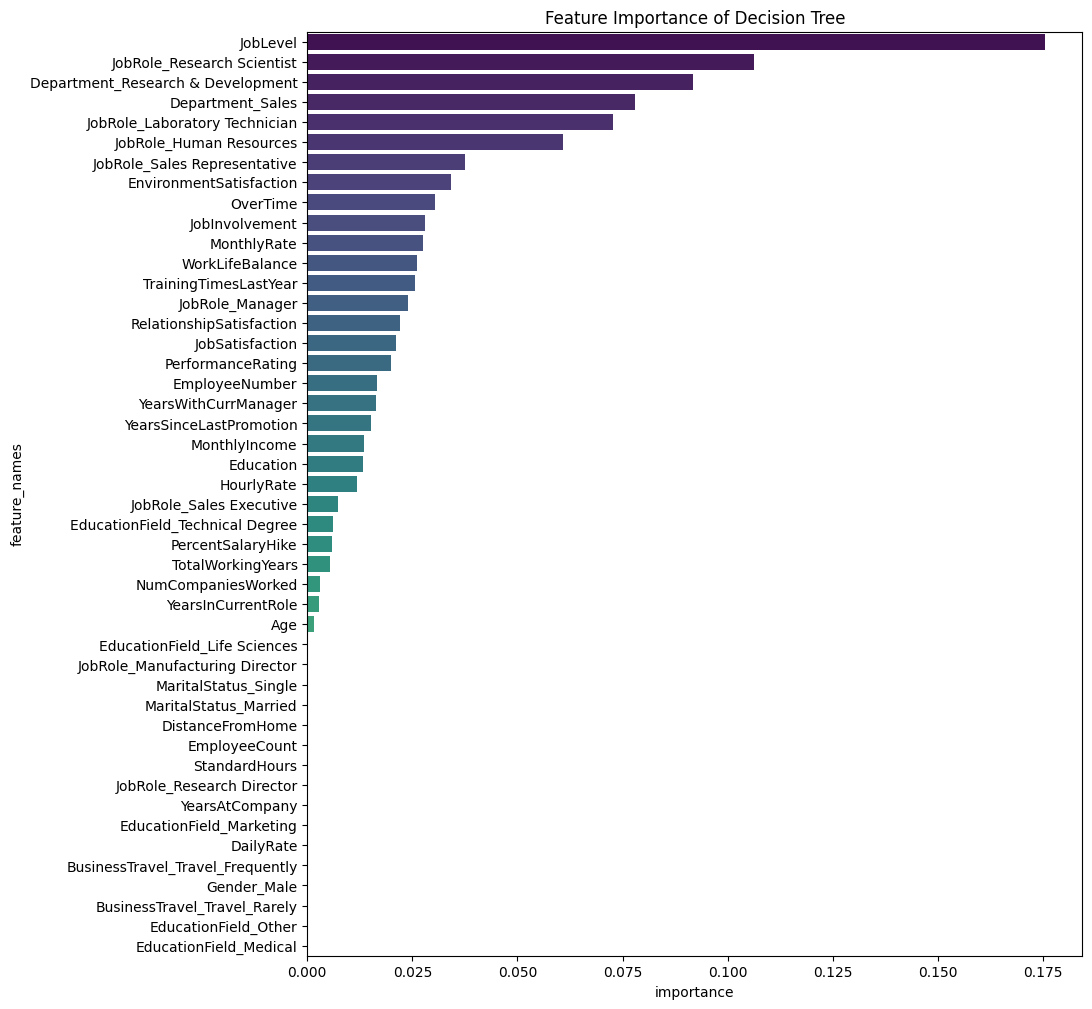

In [83]:
"""Feature Importance 
* visualize feature importance of Decision Tree""" 

# Print numerical columns
numerical_column_names = X.columns  
print("numerical columns are: ", numerical_column_names)
print()

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": numerical_column_names,
    "importance": classifier.feature_importances_
})

# Visualize ranked features using seaborn
plt.figure(figsize=(10, 12))
sns.barplot(x="importance",
            y="feature_names",
            data=feature_importance.sort_values(by="importance", ascending=False),
            palette="viridis",
            errorbar=None
            )
plt.title('Feature Importance of Decision Tree')
plt.show()


#### Most important features



Is the Stock Option Level considered more important to stay or a consequence of the longevity of the employees' career within the Company? 
.. No


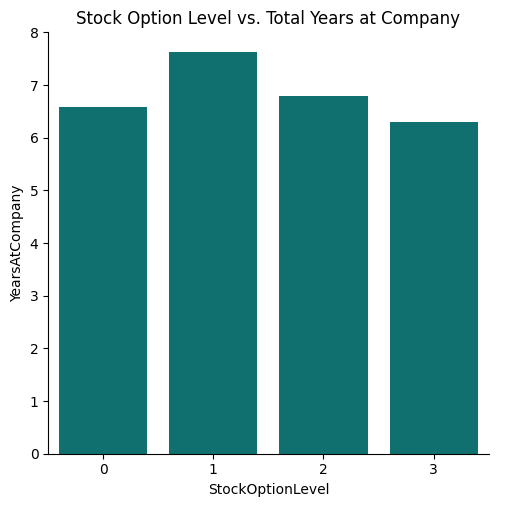

In [84]:
# Compare Stock Option Level with Years at the Company

sns.catplot(x="StockOptionLevel", 
            y="YearsAtCompany", 
            data=df, 
            kind="bar", 
            color="teal", 
            errorbar=None,
            order=df["StockOptionLevel"].value_counts().index
            )
plt.title('Stock Option Level vs. Total Years at Company')
plt.show()

C:\Users\Karen\AppData\Local\Temp\ipykernel_2980\2888383428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance",


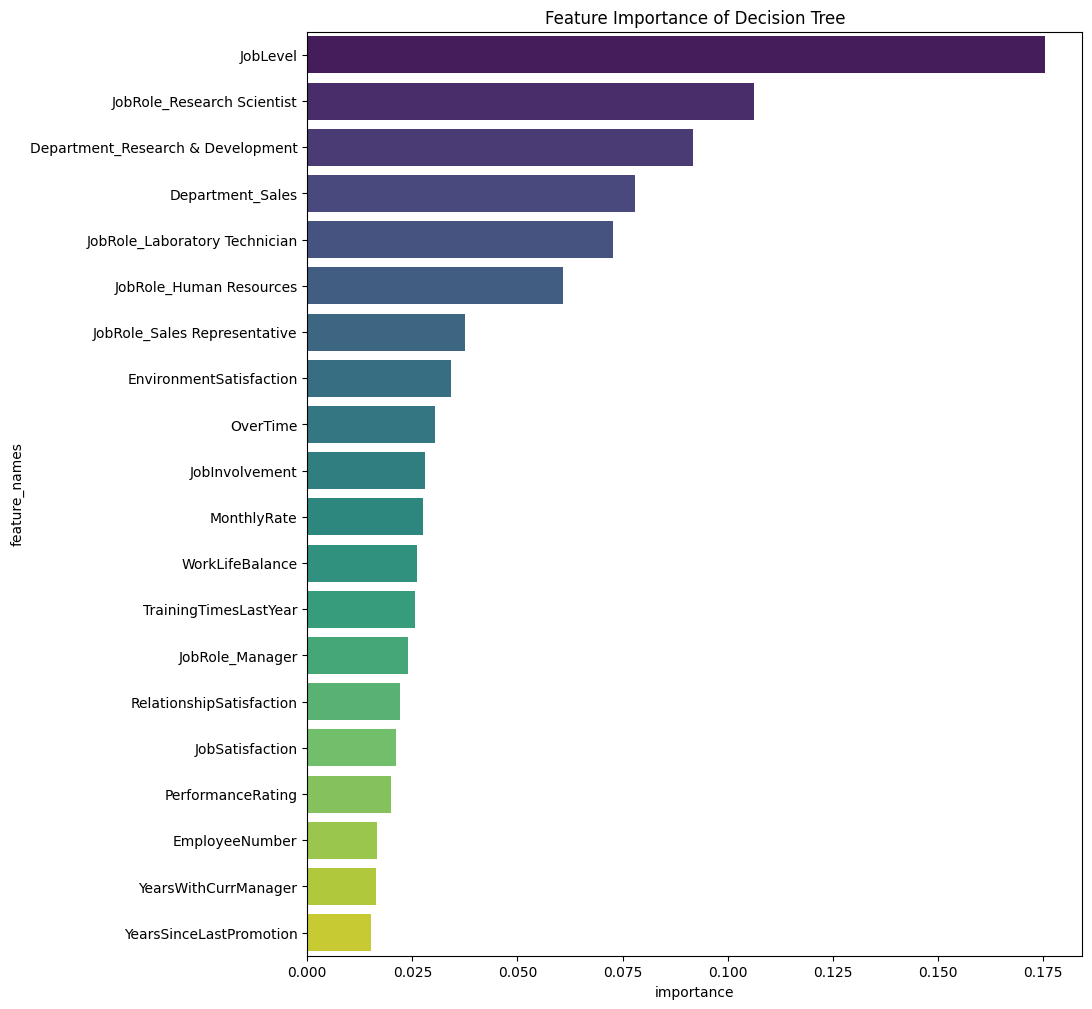

In [85]:
# Visualize ranked features using seaborn with top 20
plt.figure(figsize=(10, 12))
sns.barplot(x="importance",
            y="feature_names",
            data=feature_importance.sort_values(by="importance", ascending=False).head(20),
            palette="viridis",
            errorbar=None
            )
plt.title('Feature Importance of Decision Tree')
plt.show()
